# Initializing project

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import time

#for google access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = "../content/drive/My Drive/CSCI_534 Project/Project/AMC Data"
# project_path = './'

amc_stock = pd.read_csv(project_path+'/AMC Stock Data.csv') #181 of sample
amc_liwc = pd.read_csv(project_path+'/amc_liwc.csv') #112240 of samples

# Preparing data

In this part, we will combine and prepare the data is neccessary for the model to learn such as date, stock price and liwc scores.

In [ ]:
#In this part we are preparing data for processing (taking datetime and scores from liwc data)
amc_liwc_date = amc_liwc['Datetime'].to_numpy()
amc_liwc_drives = amc_liwc['drives'].to_numpy()
amc_liwc_affiliation = amc_liwc['affiliation'].to_numpy()
amc_liwc_achieve = amc_liwc['achieve'].to_numpy()
amc_liwc_power = amc_liwc['power'].to_numpy()
amc_liwc_reward = amc_liwc['reward'].to_numpy()
amc_liwc_risk = amc_liwc['risk'].to_numpy()

In [ ]:
#Cleaning amc data
for i in range(len(amc_liwc_date)):
  amc_liwc_date[i] = amc_liwc_date[i].split()[0]    #cleaning the data only the date
  #change date fromat
  #mm/dd/yyy
  amc_liwc_date[i]=time.strptime(amc_liwc_date[i],'%Y-%m-%d') 
  amc_liwc_date[i]=time.strftime('%m/%d/%Y',amc_liwc_date[i])

In [ ]:
#put amc liwc data in df
amc_liwc_df = pd.DataFrame({
    'Date':amc_liwc_date,
    'drives':amc_liwc_drives,
    'affiliation':amc_liwc_affiliation,
    'achieve':amc_liwc_achieve,
    'power':amc_liwc_power,
    'reward':amc_liwc_reward,
    'risk':amc_liwc_risk
})
#combine data on the same date(caculate the descriptive statistics of "drives","affiliation","achieve","power","reward","risk")
#mean
amc_liwc_df_mean = amc_liwc_df.groupby(['Date']).agg({'drives':np.mean,'affiliation':np.mean,'achieve':np.mean,'power':np.mean,'reward':np.mean,'risk':np.mean}).reset_index()
#median
amc_liwc_df_median = amc_liwc_df.groupby(['Date']).agg({'drives':np.median,'affiliation':np.median,'achieve':np.median,'power':np.median,'reward':np.median,'risk':np.median}).reset_index()
#std
amc_liwc_df_std = amc_liwc_df.groupby(['Date']).agg({'drives':np.std,'affiliation':np.std,'achieve':np.std,'power':np.std,'reward':np.std,'risk':np.std}).reset_index()
#max
amc_liwc_df_max = amc_liwc_df.groupby(['Date']).agg({'drives':np.max,'affiliation':np.max,'achieve':np.max,'power':np.max,'reward':np.max,'risk':np.max}).reset_index()
#min
amc_liwc_df_min = amc_liwc_df.groupby(['Date']).agg({'drives':np.min,'affiliation':np.min,'achieve':np.min,'power':np.min,'reward':np.min,'risk':np.min}).reset_index()


In [ ]:
#clean the stock date(taking datetime and close from stock data)
amc_stock_date = amc_stock['Date'].to_numpy()
amc_stock_close = amc_stock['Close'].to_numpy()

In [ ]:
#get stock date and change format
for i in range(len(amc_stock_date)):
  amc_stock_date[i] = amc_stock_date[i].split()[0]
  amc_stock_date[i]=time.strptime(amc_stock_date[i],'%m/%d/%Y')
  amc_stock_date[i]=time.strftime('%m/%d/%Y',amc_stock_date[i])

In [ ]:
#put amc stock data in df
amc_stock_df = pd.DataFrame({
    'Date':amc_stock_date,
    'close':amc_stock_close
})
#amc_stock_df

In [ ]:
#normalizing the stock value
amc_stock_df['close'] = (amc_stock_df['close'] - amc_stock_df['close'].min()) / (amc_stock_df['close'].max() - amc_stock_df['close'].min())
#amc_stock_df

In [ ]:
#merge liwc mean data and stock data
amc_merge_df_mean = pd.merge(amc_liwc_df_mean,amc_stock_df,on='Date',how="left")
amc_merge_df_mean = amc_merge_df_mean.dropna().reset_index(drop=True)


#median
amc_merge_df_median = pd.merge(amc_liwc_df_median,amc_stock_df,on='Date',how="left")
amc_merge_df_median = amc_merge_df_median.dropna().reset_index(drop=True)

#std
amc_merge_df_std = pd.merge(amc_liwc_df_std,amc_stock_df,on='Date',how="left")
amc_merge_df_std = amc_merge_df_std.dropna().reset_index(drop=True)

#max
amc_merge_df_max = pd.merge(amc_liwc_df_max,amc_stock_df,on='Date',how="left")
amc_merge_df_max = amc_merge_df_max.dropna().reset_index(drop=True)

#min
amc_merge_df_min = pd.merge(amc_liwc_df_min,amc_stock_df,on='Date',how="left")
amc_merge_df_min = amc_merge_df_min.dropna().reset_index(drop=True)

amc_merge_df_mean.shape #51 days worth of data

(51, 8)

# Training the linear model

Training the linear model for AMC

In [ ]:
#Creating a model based on the amc data
#amc_merge_df[['drives','affiliation','achieve','power','reward','risk']] is the data or x or feature
#amc_merge_df[['close']] is the label
#mean
reg_amc_mean = LinearRegression().fit(amc_merge_df_mean[['drives','affiliation','achieve','power','reward','risk']][:-10], amc_merge_df_mean[['close']][:-10])
#median
reg_amc_median = LinearRegression().fit(amc_merge_df_median[['drives','affiliation','achieve','power','reward','risk']][:-10], amc_merge_df_median[['close']][:-10])
#std
reg_amc_std = LinearRegression().fit(amc_merge_df_std[['drives','affiliation','achieve','power','reward','risk']][:-10], amc_merge_df_std[['close']][:-10])
#max
reg_amc_max = LinearRegression().fit(amc_merge_df_max[['drives','affiliation','achieve','power','reward','risk']][:-10], amc_merge_df_max[['close']][:-10])
#min
reg_amc_min = LinearRegression().fit(amc_merge_df_min[['drives','affiliation','achieve','power','reward','risk']][:-10], amc_merge_df_min[['close']][:-10])

# Plot the data and model of for each company

Predict AMC model with all feature

In [ ]:
#each model is predicting the label using the data that we have
#pred_amc is a numpy array consisting the values of prediction of the amc data that we use for the training
#mean 
pred_amc_mean = reg_amc_mean.predict(amc_merge_df_mean[['drives','affiliation','achieve','power','reward','risk']][-10:])
#median
pred_amc_median = reg_amc_median.predict(amc_merge_df_median[['drives','affiliation','achieve','power','reward','risk']][-10:])
#std
pred_amc_std = reg_amc_std.predict(amc_merge_df_std[['drives','affiliation','achieve','power','reward','risk']][-10:])
#max
pred_amc_max = reg_amc_max.predict(amc_merge_df_max[['drives','affiliation','achieve','power','reward','risk']][-10:])
#min
pred_amc_min = reg_amc_min.predict(amc_merge_df_min[['drives','affiliation','achieve','power','reward','risk']][-10:])

#To plot the training model
#mean 
train_amc_mean = reg_amc_mean.predict(amc_merge_df_mean[['drives','affiliation','achieve','power','reward','risk']][:-10])
#median
train_amc_median = reg_amc_median.predict(amc_merge_df_median[['drives','affiliation','achieve','power','reward','risk']][:-10])
#std
train_amc_std = reg_amc_std.predict(amc_merge_df_std[['drives','affiliation','achieve','power','reward','risk']][:-10])
#max
train_amc_max = reg_amc_max.predict(amc_merge_df_max[['drives','affiliation','achieve','power','reward','risk']][:-10])
#min
train_amc_min = reg_amc_min.predict(amc_merge_df_min[['drives','affiliation','achieve','power','reward','risk']][:-10])


#In this part, I am combining the data  of each company with the prediction
#mean
amc_merge_pred_mean = pd.concat([amc_merge_df_mean[:-10], pd.DataFrame(train_amc_mean,columns=['pred'])], axis=1)
#median
amc_merge_pred_median = pd.concat([amc_merge_df_median[:-10], pd.DataFrame(train_amc_median,columns=['pred'])], axis=1)
#std
amc_merge_pred_std = pd.concat([amc_merge_df_std[:-10], pd.DataFrame(train_amc_std,columns=['pred'])], axis=1)
#max
amc_merge_pred_max = pd.concat([amc_merge_df_max[:-10], pd.DataFrame(train_amc_max,columns=['pred'])], axis=1)
#min
amc_merge_pred_min = pd.concat([amc_merge_df_min[:-10], pd.DataFrame(train_amc_min,columns=['pred'])], axis=1)


Display the perfomance of the model

In [ ]:
from sklearn.metrics import mean_squared_error

#This is the score of the prediction/ performance of the model
#mean
amc_score_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_mean)
#median
amc_score_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_median)
#std
amc_score_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_std)
#max
amc_score_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_max)
#min
amc_score_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_min)
[amc_score_mean,amc_score_median,amc_score_std,amc_score_max,amc_score_min]

[0.00407415773720255,
 0.011156792317051403,
 0.006344544079996446,
 0.002465310620490941,
 0.0184466410870559]

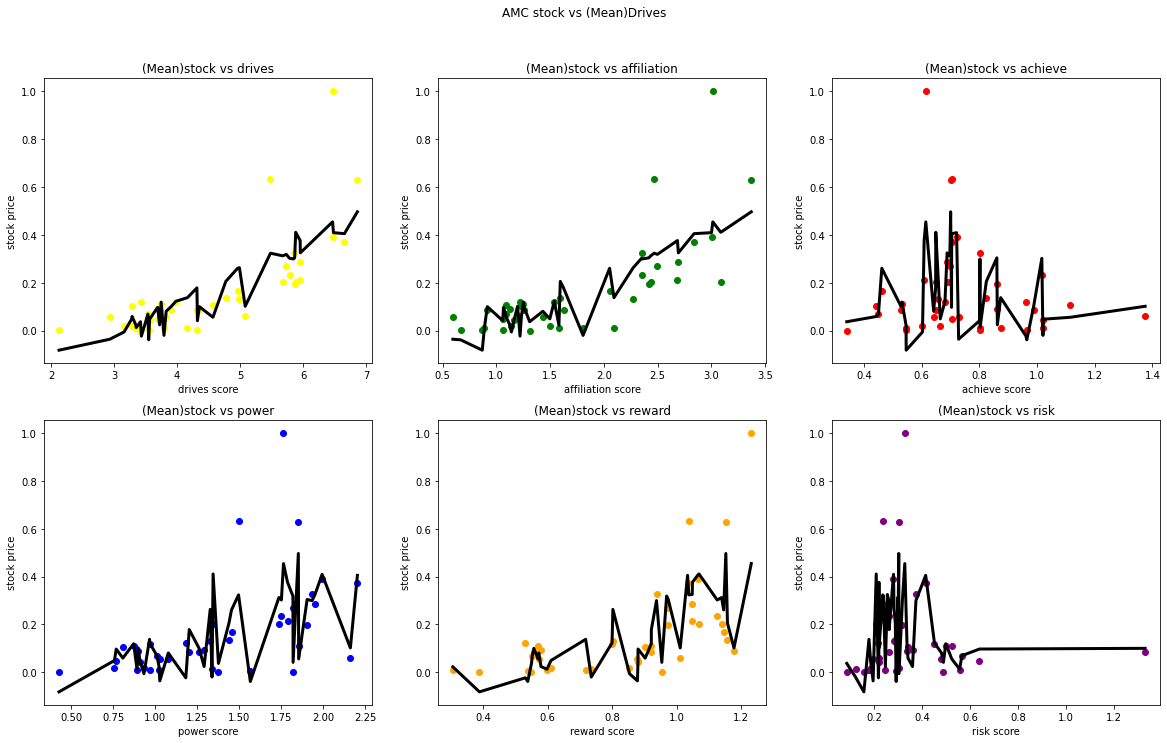

In [ ]:
#plot amc 'drives','affiliation','achieve','power','reward','risk'
#In this part, it is plotting the data with the stock + the model itself
#Mean Drives
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Mean)Drives')
fig.set_size_inches(20,10)

amc_sort_drives_mean = amc_merge_pred_mean.sort_values(by=['drives'])
axs[0,0].scatter(amc_sort_drives_mean[['drives']],amc_sort_drives_mean[['close']],color='yellow',label='drives')#Plotting the data
axs[0,0].plot(amc_sort_drives_mean[['drives']], amc_sort_drives_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('(Mean)stock vs drives')
axs[0,0].set(xlabel='drives score', ylabel='stock price')

amc_sort_affiliation_mean = amc_merge_pred_mean.sort_values(by=['affiliation'])
axs[0,1].scatter(amc_sort_affiliation_mean[['affiliation']],amc_sort_affiliation_mean[['close']],color='green',label='affiliation')#Plotting the data
axs[0,1].plot(amc_sort_affiliation_mean[['affiliation']], amc_sort_affiliation_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(Mean)stock vs affiliation')
axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

amc_sort_achieve_mean = amc_merge_pred_mean.sort_values(by=['achieve'])
axs[0,2].scatter(amc_sort_achieve_mean[['achieve']],amc_sort_achieve_mean[['close']],color='red',label='achieve') #Plotting the data
axs[0,2].plot(amc_sort_achieve_mean[['achieve']], amc_sort_achieve_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('(Mean)stock vs achieve')
axs[0,2].set(xlabel='achieve score', ylabel='stock price')

amc_sort_power_mean = amc_merge_pred_mean.sort_values(by=['power'])
axs[1,0].scatter(amc_sort_power_mean[['power']],amc_sort_power_mean[['close']],color='blue',label='power') #Plotting the data
axs[1,0].plot(amc_sort_power_mean[['power']], amc_sort_power_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,0].set_title('(Mean)stock vs power')
axs[1,0].set(xlabel='power score', ylabel='stock price')

amc_sort_reward_mean = amc_merge_pred_mean.sort_values(by=['reward'])
axs[1,1].scatter(amc_sort_reward_mean[['reward']],amc_sort_reward_mean[['close']],color='orange',label='reward') #Plotting the data
axs[1,1].plot(amc_sort_reward_mean[['reward']], amc_sort_reward_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,1].set_title('(Mean)stock vs reward')
axs[1,1].set(xlabel='reward score', ylabel='stock price')

amc_sort_risk_mean = amc_merge_pred_mean.sort_values(by=['risk'])
axs[1,2].scatter(amc_sort_risk_mean[['risk']],amc_sort_risk_mean[['close']],color='purple',label='risk') #Plotting the data
axs[1,2].plot(amc_sort_risk_mean[['risk']], amc_sort_risk_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,2].set_title('(Mean)stock vs risk')
axs[1,2].set(xlabel='risk score', ylabel='stock price')

plt.show()

In [ ]:
# #Median Drives
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Median)Drives')
# fig.set_size_inches(20,10)

# amc_sort_drives_median = amc_merge_pred_median.sort_values(by=['drives'])
# axs[0,0].scatter(amc_sort_drives_median[['drives']],amc_sort_drives_median[['close']],color='yellow',label='drives')#Plotting the data
# axs[0,0].plot(amc_sort_drives_median[['drives']], amc_sort_drives_median[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('(Median)stock vs drives')
# axs[0,0].set(xlabel='drives score', ylabel='stock price')

# amc_sort_affiliation_median = amc_merge_pred_median.sort_values(by=['affiliation'])
# axs[0,1].scatter(amc_sort_affiliation_median[['affiliation']],amc_sort_affiliation_median[['close']],color='green',label='affiliation')#Plotting the data
# axs[0,1].plot(amc_sort_affiliation_median[['affiliation']], amc_sort_affiliation_median[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('(Median)stock vs affiliation')
# axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

# amc_sort_achieve_median = amc_merge_pred_median.sort_values(by=['achieve'])
# axs[0,2].scatter(amc_sort_achieve_median[['achieve']],amc_sort_achieve_median[['close']],color='red',label='achieve') #Plotting the data
# axs[0,2].plot(amc_sort_achieve_median[['achieve']], amc_sort_achieve_median[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('(Median)stock vs achieve')
# axs[0,2].set(xlabel='achieve score', ylabel='stock price')

# amc_sort_power_median = amc_merge_pred_median.sort_values(by=['power'])
# axs[1,0].scatter(amc_sort_power_median[['power']],amc_sort_power_median[['close']],color='blue',label='power') #Plotting the data
# axs[1,0].plot(amc_sort_power_median[['power']], amc_sort_power_median[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,0].set_title('(Median)stock vs power')
# axs[1,0].set(xlabel='power score', ylabel='stock price')

# amc_sort_reward_median = amc_merge_pred_median.sort_values(by=['reward'])
# axs[1,1].scatter(amc_sort_reward_median[['reward']],amc_sort_reward_median[['close']],color='orange',label='reward') #Plotting the data
# axs[1,1].plot(amc_sort_reward_median[['reward']], amc_sort_reward_median[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,1].set_title('(Median)stock vs reward')
# axs[1,1].set(xlabel='reward score', ylabel='stock price')

# amc_sort_risk_median = amc_merge_pred_median.sort_values(by=['risk'])
# axs[1,2].scatter(amc_sort_risk_median[['risk']],amc_sort_risk_median[['close']],color='purple',label='risk') #Plotting the data
# axs[1,2].plot(amc_sort_risk_median[['risk']], amc_sort_risk_median[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,2].set_title('(Median)stock vs risk')
# axs[1,2].set(xlabel='risk score', ylabel='stock price')

# plt.show()

In [ ]:
# #Std Drives
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Std)Drives')
# fig.set_size_inches(20,10)

# amc_sort_drives_std = amc_merge_pred_std.sort_values(by=['drives'])
# axs[0,0].scatter(amc_sort_drives_std[['drives']],amc_sort_drives_std[['close']],color='yellow',label='drives')#Plotting the data
# axs[0,0].plot(amc_sort_drives_std[['drives']], amc_sort_drives_std[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('(Std)stock vs drives')
# axs[0,0].set(xlabel='drives score', ylabel='stock price')

# amc_sort_affiliation_std = amc_merge_pred_std.sort_values(by=['affiliation'])
# axs[0,1].scatter(amc_sort_affiliation_std[['affiliation']],amc_sort_affiliation_std[['close']],color='green',label='affiliation')#Plotting the data
# axs[0,1].plot(amc_sort_affiliation_std[['affiliation']], amc_sort_affiliation_std[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('(Std)stock vs affiliation')
# axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

# amc_sort_achieve_std = amc_merge_pred_std.sort_values(by=['achieve'])
# axs[0,2].scatter(amc_sort_achieve_std[['achieve']],amc_sort_achieve_std[['close']],color='red',label='achieve') #Plotting the data
# axs[0,2].plot(amc_sort_achieve_std[['achieve']], amc_sort_achieve_std[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('(Std)stock vs achieve')
# axs[0,2].set(xlabel='achieve score', ylabel='stock price')

# amc_sort_power_std = amc_merge_pred_std.sort_values(by=['power'])
# axs[1,0].scatter(amc_sort_power_std[['power']],amc_sort_power_std[['close']],color='blue',label='power') #Plotting the data
# axs[1,0].plot(amc_sort_power_std[['power']], amc_sort_power_std[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,0].set_title('(Std)stock vs power')
# axs[1,0].set(xlabel='power score', ylabel='stock price')

# amc_sort_reward_std = amc_merge_pred_std.sort_values(by=['reward'])
# axs[1,1].scatter(amc_sort_reward_std[['reward']],amc_sort_reward_std[['close']],color='orange',label='reward') #Plotting the data
# axs[1,1].plot(amc_sort_reward_std[['reward']], amc_sort_reward_std[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,1].set_title('(Std)stock vs reward')
# axs[1,1].set(xlabel='reward score', ylabel='stock price')

# amc_sort_risk_std = amc_merge_pred_std.sort_values(by=['risk'])
# axs[1,2].scatter(amc_sort_risk_std[['risk']],amc_sort_risk_std[['close']],color='purple',label='risk') #Plotting the data
# axs[1,2].plot(amc_sort_risk_std[['risk']], amc_sort_risk_std[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,2].set_title('(Std)stock vs risk')
# axs[1,2].set(xlabel='risk score', ylabel='stock price')

# plt.show()

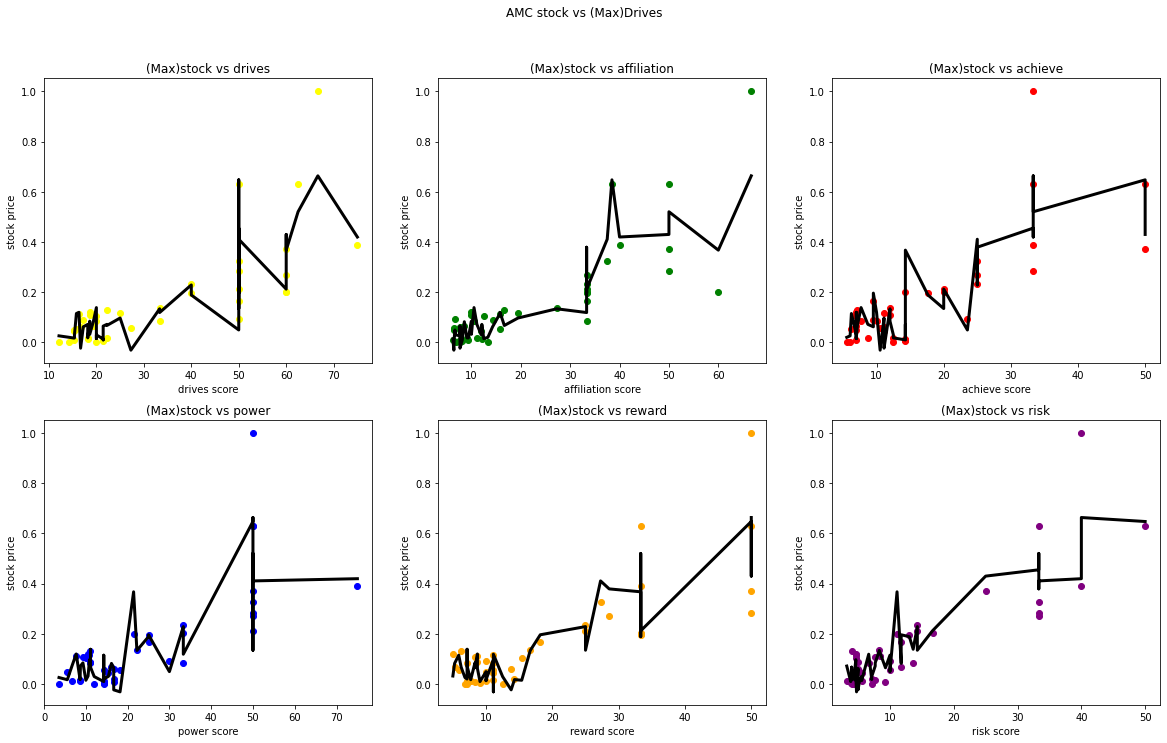

In [ ]:
#Max Drives
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Max)Drives')
fig.set_size_inches(20,10)

amc_sort_drives_max = amc_merge_pred_max.sort_values(by=['drives'])
axs[0,0].scatter(amc_sort_drives_max[['drives']],amc_sort_drives_max[['close']],color='yellow',label='drives')#Plotting the data
axs[0,0].plot(amc_sort_drives_max[['drives']], amc_sort_drives_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('(Max)stock vs drives')
axs[0,0].set(xlabel='drives score', ylabel='stock price')

amc_sort_affiliation_max = amc_merge_pred_max.sort_values(by=['affiliation'])
axs[0,1].scatter(amc_sort_affiliation_max[['affiliation']],amc_sort_affiliation_max[['close']],color='green',label='affiliation')#Plotting the data
axs[0,1].plot(amc_sort_affiliation_max[['affiliation']], amc_sort_affiliation_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(Max)stock vs affiliation')
axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

amc_sort_achieve_max = amc_merge_pred_max.sort_values(by=['achieve'])
axs[0,2].scatter(amc_sort_achieve_max[['achieve']],amc_sort_achieve_max[['close']],color='red',label='achieve') #Plotting the data
axs[0,2].plot(amc_sort_achieve_max[['achieve']], amc_sort_achieve_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('(Max)stock vs achieve')
axs[0,2].set(xlabel='achieve score', ylabel='stock price')

amc_sort_power_max = amc_merge_pred_max.sort_values(by=['power'])
axs[1,0].scatter(amc_sort_power_max[['power']],amc_sort_power_max[['close']],color='blue',label='power') #Plotting the data
axs[1,0].plot(amc_sort_power_max[['power']], amc_sort_power_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,0].set_title('(Max)stock vs power')
axs[1,0].set(xlabel='power score', ylabel='stock price')

amc_sort_reward_max = amc_merge_pred_max.sort_values(by=['reward'])
axs[1,1].scatter(amc_sort_reward_max[['reward']],amc_sort_reward_max[['close']],color='orange',label='reward') #Plotting the data
axs[1,1].plot(amc_sort_reward_max[['reward']], amc_sort_reward_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,1].set_title('(Max)stock vs reward')
axs[1,1].set(xlabel='reward score', ylabel='stock price')

amc_sort_risk_max = amc_merge_pred_max.sort_values(by=['risk'])
axs[1,2].scatter(amc_sort_risk_max[['risk']],amc_sort_risk_max[['close']],color='purple',label='risk') #Plotting the data
axs[1,2].plot(amc_sort_risk_max[['risk']], amc_sort_risk_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,2].set_title('(Max)stock vs risk')
axs[1,2].set(xlabel='risk score', ylabel='stock price')

plt.show()

In [ ]:
# #Min Drives
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Min)Drives')
# fig.set_size_inches(20,10)

# amc_sort_drives_min = amc_merge_pred_min.sort_values(by=['drives'])
# axs[0,0].scatter(amc_sort_drives_min[['drives']],amc_sort_drives_min[['close']],color='yellow',label='drives')#Plotting the data
# axs[0,0].plot(amc_sort_drives_min[['drives']], amc_sort_drives_min[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('(Min)stock vs drives')
# axs[0,0].set(xlabel='drives score', ylabel='stock price')

# amc_sort_affiliation_min = amc_merge_pred_min.sort_values(by=['affiliation'])
# axs[0,1].scatter(amc_sort_affiliation_min[['affiliation']],amc_sort_affiliation_min[['close']],color='green',label='affiliation')#Plotting the data
# axs[0,1].plot(amc_sort_affiliation_min[['affiliation']], amc_sort_affiliation_min[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('(Min)stock vs affiliation')
# axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

# amc_sort_achieve_min = amc_merge_pred_min.sort_values(by=['achieve'])
# axs[0,2].scatter(amc_sort_achieve_min[['achieve']],amc_sort_achieve_min[['close']],color='red',label='achieve') #Plotting the data
# axs[0,2].plot(amc_sort_achieve_min[['achieve']], amc_sort_achieve_min[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('(Min)stock vs achieve')
# axs[0,2].set(xlabel='achieve score', ylabel='stock price')

# amc_sort_power_min = amc_merge_pred_min.sort_values(by=['power'])
# axs[1,0].scatter(amc_sort_power_min[['power']],amc_sort_power_min[['close']],color='blue',label='power') #Plotting the data
# axs[1,0].plot(amc_sort_power_min[['power']], amc_sort_power_min[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,0].set_title('(Min)stock vs power')
# axs[1,0].set(xlabel='power score', ylabel='stock price')

# amc_sort_reward_min = amc_merge_pred_min.sort_values(by=['reward'])
# axs[1,1].scatter(amc_sort_reward_min[['reward']],amc_sort_reward_min[['close']],color='orange',label='reward') #Plotting the data
# axs[1,1].plot(amc_sort_reward_min[['reward']], amc_sort_reward_min[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,1].set_title('(Min)stock vs reward')
# axs[1,1].set(xlabel='reward score', ylabel='stock price')

# amc_sort_risk_min = amc_merge_pred_min.sort_values(by=['risk'])
# axs[1,2].scatter(amc_sort_risk_min[['risk']],amc_sort_risk_min[['close']],color='purple',label='risk') #Plotting the data
# axs[1,2].plot(amc_sort_risk_min[['risk']], amc_sort_risk_min[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[1,2].set_title('(Min)stock vs risk')
# axs[1,2].set(xlabel='risk score', ylabel='stock price')

# plt.show()

# Plot data against time

Plotting AMC stock with mean Drives

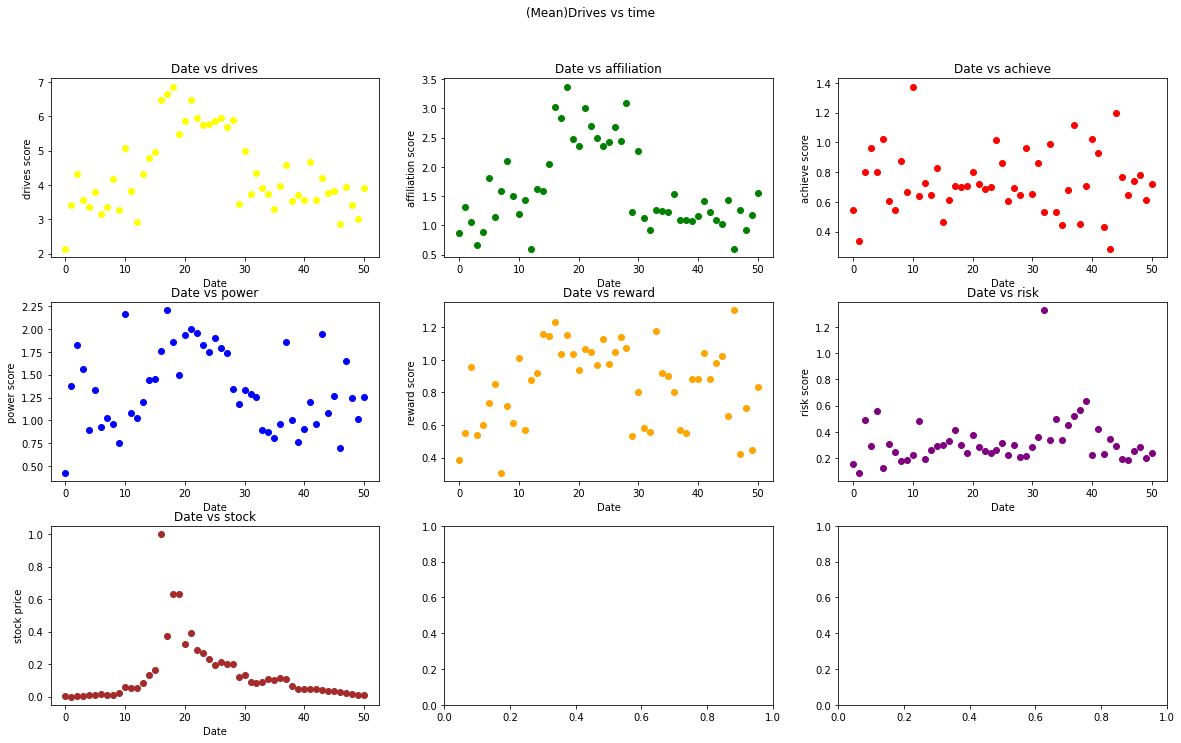

In [ ]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Mean)Drives vs time')
fig.set_size_inches(20,10)

amc_sort_drives_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_drives_mean.shape[0])],amc_sort_drives_mean[['drives']],color='yellow',label='drives')
axs[0,0].set_title('Date vs drives')
axs[0,0].set(xlabel='Date', ylabel='drives score')

amc_sort_affiliation_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_affiliation_mean.shape[0])],amc_sort_affiliation_mean[['affiliation']],color='green',label='affiliation')
axs[0,1].set_title('Date vs affiliation')
axs[0,1].set(xlabel='Date', ylabel='affiliation score')

amc_sort_achieve_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(amc_sort_achieve_mean.shape[0])],amc_sort_achieve_mean[['achieve']],color='red',label='achieve')
axs[0,2].set_title('Date vs achieve')
axs[0,2].set(xlabel='Date', ylabel='achieve score')

amc_sort_power_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_power_mean.shape[0])],amc_sort_power_mean[['power']],color='blue',label='power')
axs[1,0].set_title('Date vs power')
axs[1,0].set(xlabel='Date', ylabel='power score')

amc_sort_reward_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(amc_sort_reward_mean.shape[0])],amc_sort_reward_mean[['reward']],color='orange',label='reward')
axs[1,1].set_title('Date vs reward')
axs[1,1].set(xlabel='Date', ylabel='reward score')

amc_sort_risk_mean = amc_merge_df_mean.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(amc_sort_risk_mean.shape[0])],amc_sort_risk_mean[['risk']],color='purple',label='risk')
axs[1,2].set_title('Date vs risk')
axs[1,2].set(xlabel='Date', ylabel='risk score')

amc_sort_date = amc_merge_df_mean.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting AMC stock with median Drives

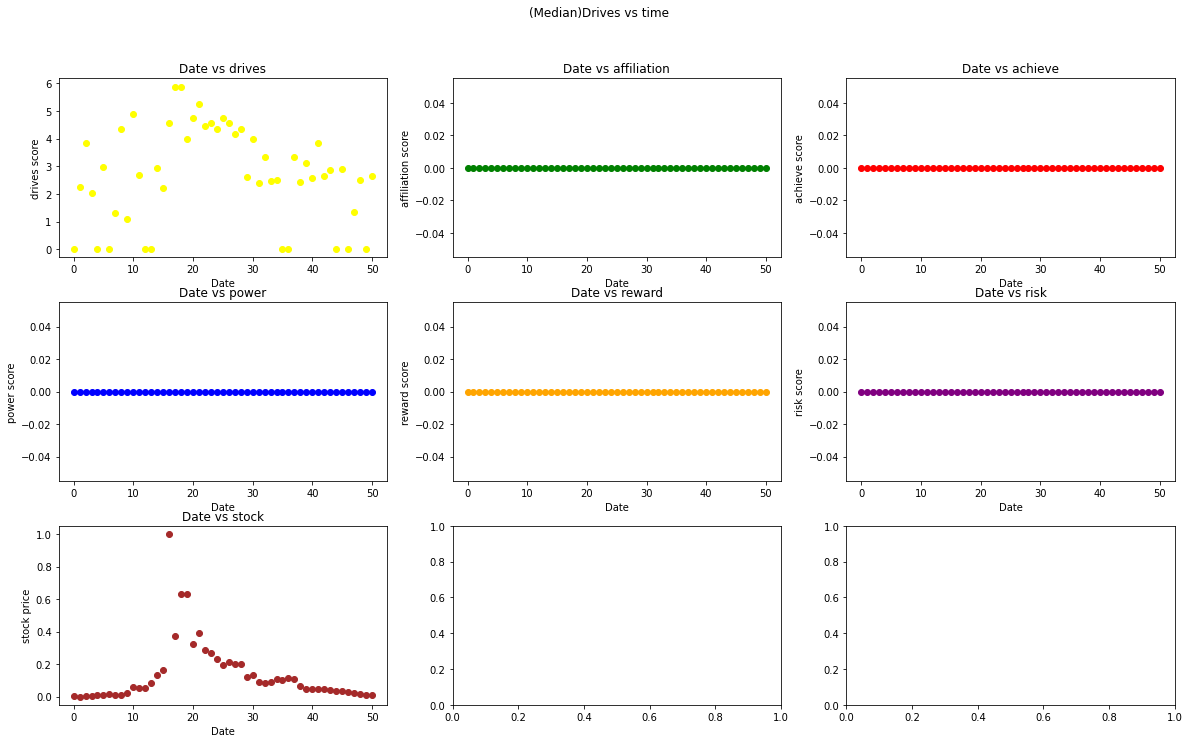

In [ ]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Median)Drives vs time')
fig.set_size_inches(20,10)

amc_sort_drives_median = amc_merge_df_median.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_drives_median.shape[0])],amc_sort_drives_median[['drives']],color='yellow',label='drives')
axs[0,0].set_title('Date vs drives')
axs[0,0].set(xlabel='Date', ylabel='drives score')

amc_sort_affiliation_median = amc_merge_df_median.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_affiliation_median.shape[0])],amc_sort_affiliation_median[['affiliation']],color='green',label='affiliation')
axs[0,1].set_title('Date vs affiliation')
axs[0,1].set(xlabel='Date', ylabel='affiliation score')

amc_sort_achieve_median = amc_merge_df_median.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(amc_sort_achieve_median.shape[0])],amc_sort_achieve_median[['achieve']],color='red',label='achieve')
axs[0,2].set_title('Date vs achieve')
axs[0,2].set(xlabel='Date', ylabel='achieve score')

amc_sort_power_median = amc_merge_df_median.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_power_median.shape[0])],amc_sort_power_median[['power']],color='blue',label='power')
axs[1,0].set_title('Date vs power')
axs[1,0].set(xlabel='Date', ylabel='power score')

amc_sort_reward_median = amc_merge_df_median.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(amc_sort_reward_median.shape[0])],amc_sort_reward_median[['reward']],color='orange',label='reward')
axs[1,1].set_title('Date vs reward')
axs[1,1].set(xlabel='Date', ylabel='reward score')

amc_sort_risk_median = amc_merge_df_median.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(amc_sort_risk_median.shape[0])],amc_sort_risk_median[['risk']],color='purple',label='risk')
axs[1,2].set_title('Date vs risk')
axs[1,2].set(xlabel='Date', ylabel='risk score')

amc_sort_date = amc_merge_df_median.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting AMC stock with std Drives

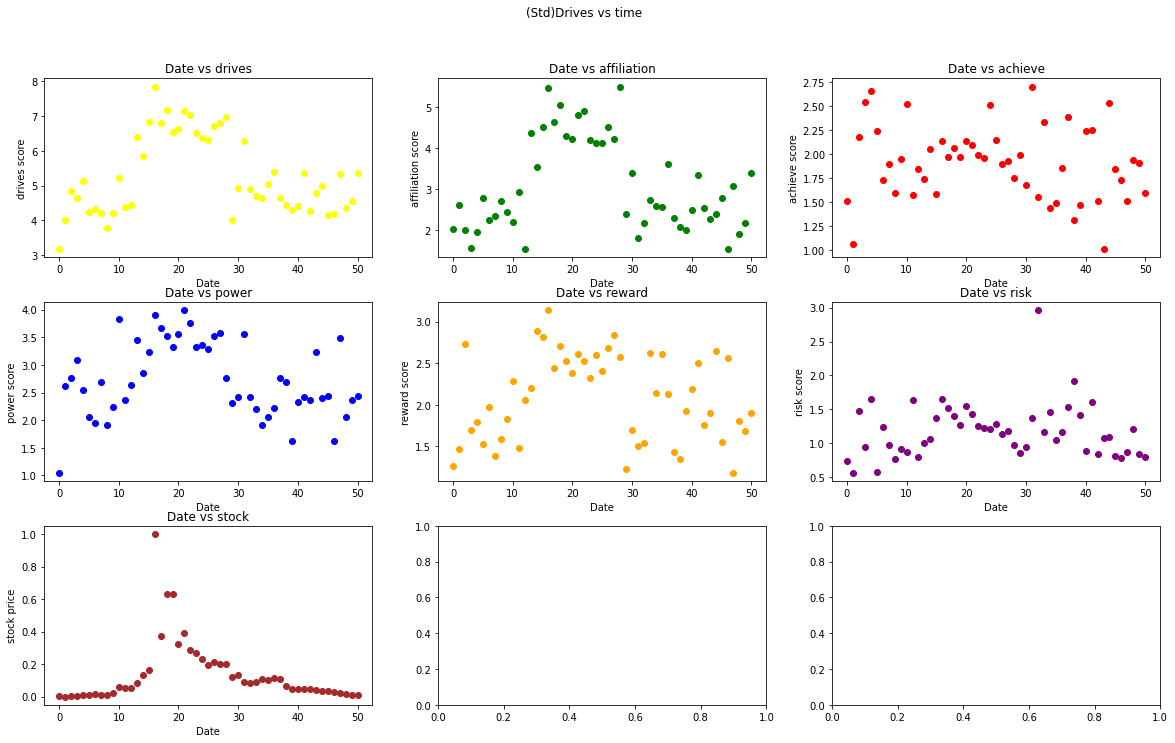

In [ ]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Std)Drives vs time')
fig.set_size_inches(20,10)

amc_sort_drives_std = amc_merge_df_std.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_drives_std.shape[0])],amc_sort_drives_std[['drives']],color='yellow',label='drives')
axs[0,0].set_title('Date vs drives')
axs[0,0].set(xlabel='Date', ylabel='drives score')

amc_sort_affiliation_std = amc_merge_df_std.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_affiliation_std.shape[0])],amc_sort_affiliation_std[['affiliation']],color='green',label='affiliation')
axs[0,1].set_title('Date vs affiliation')
axs[0,1].set(xlabel='Date', ylabel='affiliation score')

amc_sort_achieve_std = amc_merge_df_std.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(amc_sort_achieve_std.shape[0])],amc_sort_achieve_std[['achieve']],color='red',label='achieve')
axs[0,2].set_title('Date vs achieve')
axs[0,2].set(xlabel='Date', ylabel='achieve score')

amc_sort_power_std = amc_merge_df_std.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_power_std.shape[0])],amc_sort_power_std[['power']],color='blue',label='power')
axs[1,0].set_title('Date vs power')
axs[1,0].set(xlabel='Date', ylabel='power score')

amc_sort_reward_std = amc_merge_df_std.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(amc_sort_reward_std.shape[0])],amc_sort_reward_std[['reward']],color='orange',label='reward')
axs[1,1].set_title('Date vs reward')
axs[1,1].set(xlabel='Date', ylabel='reward score')

amc_sort_risk_std = amc_merge_df_std.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(amc_sort_risk_std.shape[0])],amc_sort_risk_std[['risk']],color='purple',label='risk')
axs[1,2].set_title('Date vs risk')
axs[1,2].set(xlabel='Date', ylabel='risk score')

amc_sort_date = amc_merge_df_std.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting AMC stock with maximum Drives

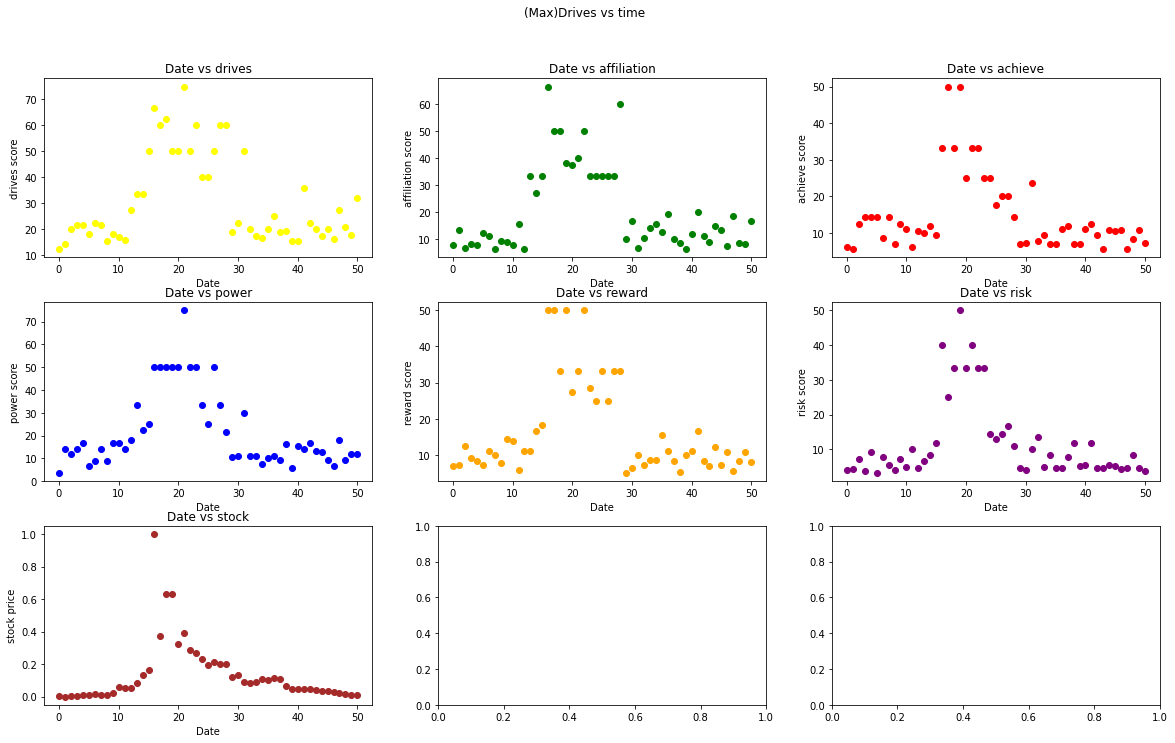

In [ ]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Max)Drives vs time')
fig.set_size_inches(20,10)

amc_sort_drives_max = amc_merge_df_max.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_drives_max.shape[0])],amc_sort_drives_max[['drives']],color='yellow',label='drives')
axs[0,0].set_title('Date vs drives')
axs[0,0].set(xlabel='Date', ylabel='drives score')

amc_sort_affiliation_max = amc_merge_df_max.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_affiliation_max.shape[0])],amc_sort_affiliation_max[['affiliation']],color='green',label='affiliation')
axs[0,1].set_title('Date vs affiliation')
axs[0,1].set(xlabel='Date', ylabel='affiliation score')

amc_sort_achieve_max = amc_merge_df_max.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(amc_sort_achieve_max.shape[0])],amc_sort_achieve_max[['achieve']],color='red',label='achieve')
axs[0,2].set_title('Date vs achieve')
axs[0,2].set(xlabel='Date', ylabel='achieve score')

amc_sort_power_max = amc_merge_df_max.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_power_max.shape[0])],amc_sort_power_max[['power']],color='blue',label='power')
axs[1,0].set_title('Date vs power')
axs[1,0].set(xlabel='Date', ylabel='power score')

amc_sort_reward_max = amc_merge_df_max.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(amc_sort_reward_max.shape[0])],amc_sort_reward_max[['reward']],color='orange',label='reward')
axs[1,1].set_title('Date vs reward')
axs[1,1].set(xlabel='Date', ylabel='reward score')

amc_sort_risk_max = amc_merge_df_max.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(amc_sort_risk_max.shape[0])],amc_sort_risk_max[['risk']],color='purple',label='risk')
axs[1,2].set_title('Date vs risk')
axs[1,2].set(xlabel='Date', ylabel='risk score')

amc_sort_date = amc_merge_df_max.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting AMC stock with minimum Drives

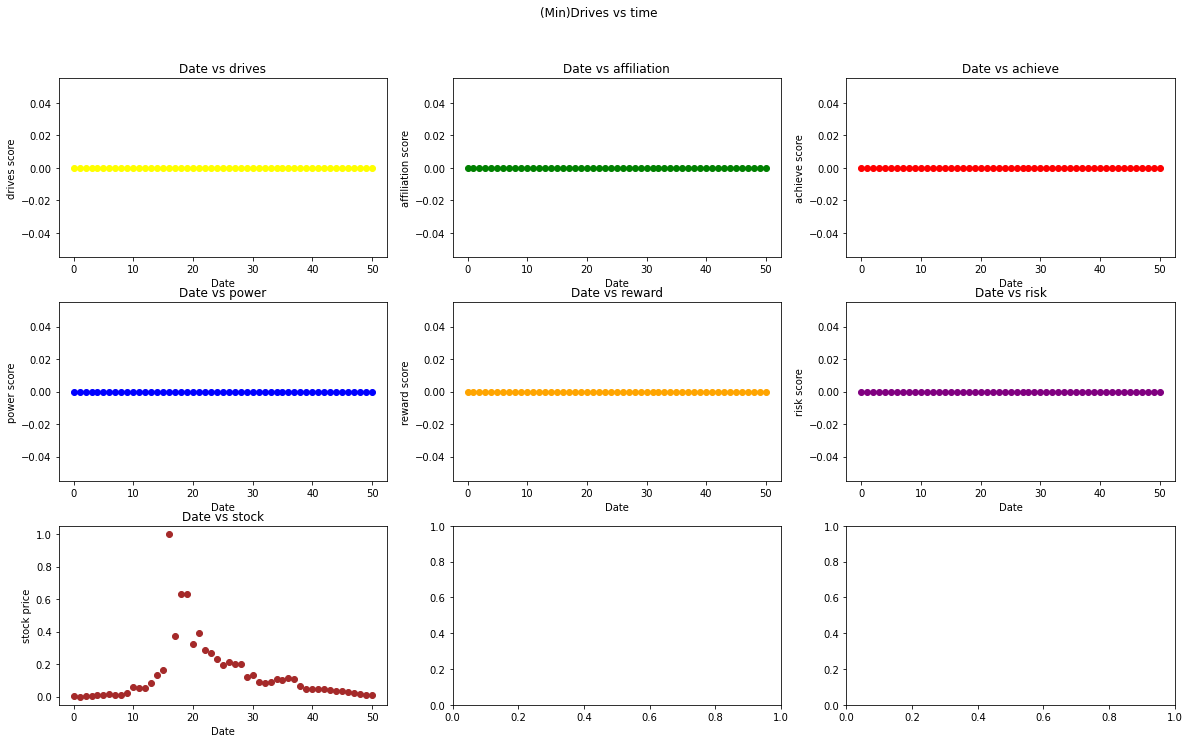

In [ ]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Min)Drives vs time')
fig.set_size_inches(20,10)

amc_sort_drives_min = amc_merge_df_min.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(amc_sort_drives_min.shape[0])],amc_sort_drives_min[['drives']],color='yellow',label='drives')
axs[0,0].set_title('Date vs drives')
axs[0,0].set(xlabel='Date', ylabel='drives score')

amc_sort_affiliation_min = amc_merge_df_min.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(amc_sort_affiliation_min.shape[0])],amc_sort_affiliation_min[['affiliation']],color='green',label='affiliation')
axs[0,1].set_title('Date vs affiliation')
axs[0,1].set(xlabel='Date', ylabel='affiliation score')

amc_sort_achieve_min = amc_merge_df_min.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(amc_sort_achieve_min.shape[0])],amc_sort_achieve_min[['achieve']],color='red',label='achieve')
axs[0,2].set_title('Date vs achieve')
axs[0,2].set(xlabel='Date', ylabel='achieve score')

amc_sort_power_min = amc_merge_df_min.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(amc_sort_power_min.shape[0])],amc_sort_power_min[['power']],color='blue',label='power')
axs[1,0].set_title('Date vs power')
axs[1,0].set(xlabel='Date', ylabel='power score')

amc_sort_reward_min = amc_merge_df_min.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(amc_sort_reward_min.shape[0])],amc_sort_reward_min[['reward']],color='orange',label='reward')
axs[1,1].set_title('Date vs reward')
axs[1,1].set(xlabel='Date', ylabel='reward score')

amc_sort_risk_min = amc_merge_df_min.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(amc_sort_risk_min.shape[0])],amc_sort_risk_min[['risk']],color='purple',label='risk')
axs[1,2].set_title('Date vs risk')
axs[1,2].set(xlabel='Date', ylabel='risk score')

amc_sort_date = amc_merge_df_min.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(amc_sort_date.shape[0])],amc_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

# Training with different method

Training with mean drives

In [ ]:
#Training models based on the amc data for four features("drives","affiliation","achieve","power","reward","risk") separately
reg_amc_drives_mean = LinearRegression().fit(amc_merge_df_mean[['drives']][:-10], amc_merge_df_mean[['close']][:-10])
reg_amc_affiliation_mean = LinearRegression().fit(amc_merge_df_mean[['affiliation']][:-10], amc_merge_df_mean[['close']][:-10])
reg_amc_achieve_mean = LinearRegression().fit(amc_merge_df_mean[['achieve']][:-10], amc_merge_df_mean[['close']][:-10])
reg_amc_power_mean = LinearRegression().fit(amc_merge_df_mean[['power']][:-10], amc_merge_df_mean[['close']][:-10])
reg_amc_reward_mean = LinearRegression().fit(amc_merge_df_mean[['reward']][:-10], amc_merge_df_mean[['close']][:-10])
reg_amc_risk_mean = LinearRegression().fit(amc_merge_df_mean[['risk']][:-10], amc_merge_df_mean[['close']][:-10])

In [ ]:
#predict the stock price of amc using new models
pred_amc_drives_mean = reg_amc_drives_mean.predict(amc_merge_df_mean[['drives']][-10:])
pred_amc_affiliation_mean = reg_amc_affiliation_mean.predict(amc_merge_df_mean[['affiliation']][-10:])
pred_amc_achieve_mean = reg_amc_achieve_mean.predict(amc_merge_df_mean[['achieve']][-10:])
pred_amc_power_mean = reg_amc_power_mean.predict(amc_merge_df_mean[['power']][-10:])
pred_amc_reward_mean = reg_amc_reward_mean.predict(amc_merge_df_mean[['reward']][-10:])
pred_amc_risk_mean = reg_amc_risk_mean.predict(amc_merge_df_mean[['risk']][-10:])

#predict on the training model to plot the data
train_amc_drives_mean = reg_amc_drives_mean.predict(amc_merge_df_mean[['drives']][:-10])
train_amc_affiliation_mean = reg_amc_affiliation_mean.predict(amc_merge_df_mean[['affiliation']][:-10])
train_amc_achieve_mean = reg_amc_achieve_mean.predict(amc_merge_df_mean[['achieve']][:-10])
train_amc_power_mean = reg_amc_power_mean.predict(amc_merge_df_mean[['power']][:-10])
train_amc_reward_mean = reg_amc_reward_mean.predict(amc_merge_df_mean[['reward']][:-10])
train_amc_risk_mean = reg_amc_risk_mean.predict(amc_merge_df_mean[['risk']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_mean = pd.concat([amc_merge_df_mean[:-10], pd.DataFrame(train_amc_drives_mean,columns=['pred_drives'])], axis=1)
amc_merge_pred1_mean = pd.concat([amc_merge_pred1_mean, pd.DataFrame(train_amc_affiliation_mean,columns=['pred_affiliation'])], axis=1)
amc_merge_pred1_mean = pd.concat([amc_merge_pred1_mean, pd.DataFrame(train_amc_achieve_mean,columns=['pred_achieve'])], axis=1)
amc_merge_pred1_mean = pd.concat([amc_merge_pred1_mean, pd.DataFrame(train_amc_power_mean,columns=['pred_power'])], axis=1)
amc_merge_pred1_mean = pd.concat([amc_merge_pred1_mean, pd.DataFrame(train_amc_reward_mean,columns=['pred_reward'])], axis=1)
amc_merge_pred1_mean = pd.concat([amc_merge_pred1_mean, pd.DataFrame(train_amc_risk_mean,columns=['pred_risk'])], axis=1)

#amc_merge_pred1_mean.head

In [ ]:
amc_score_drives_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_drives_mean)
amc_score_affiliation_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_affiliation_mean)
amc_score_achieve_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_achieve_mean)
amc_score_power_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_power_mean)
amc_score_reward_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_reward_mean)
amc_score_risk_mean = mean_squared_error(amc_merge_df_mean[['close']][-10:], pred_amc_risk_mean)
[amc_score_drives_mean,amc_score_affiliation_mean,amc_score_achieve_mean,amc_score_power_mean,amc_score_reward_mean,amc_score_risk_mean]

[0.004468197036390134,
 0.0033656329004353768,
 0.01959422496821885,
 0.01681053996518369,
 0.030072119849577368,
 0.019815272415315482]

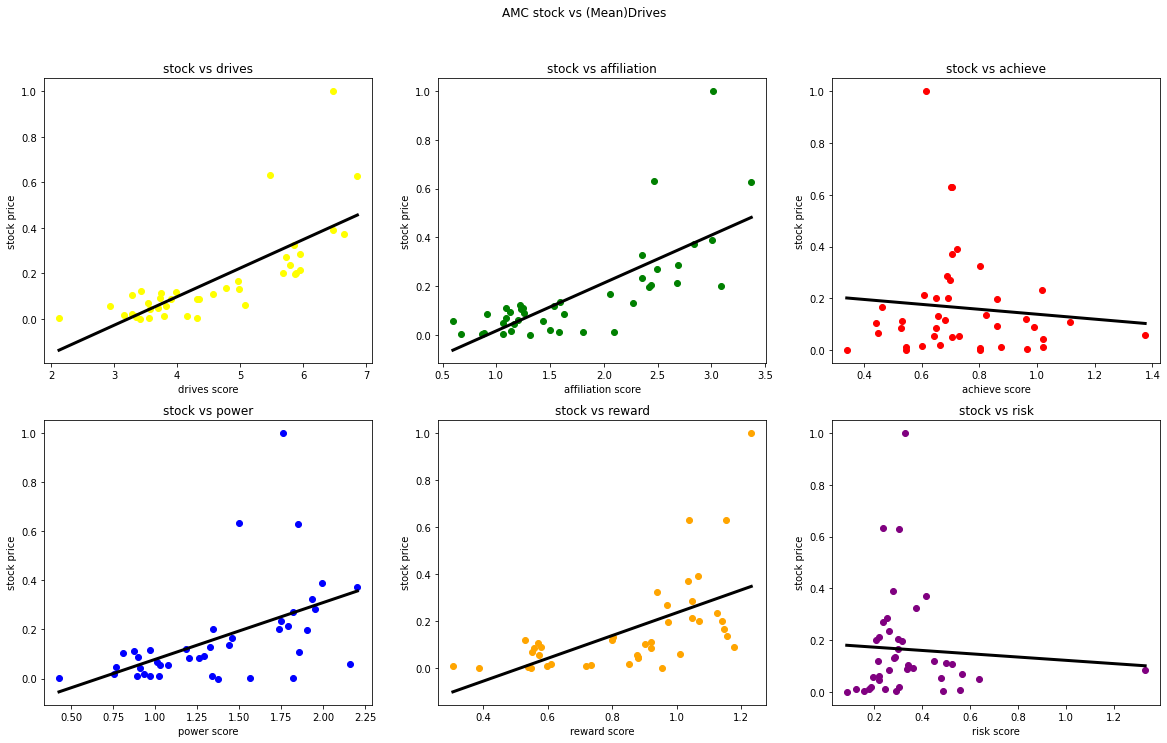

In [ ]:
#plot the new amc model ("drives","affiliation","achieve","power","reward","risk")
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Mean)Drives')
fig.set_size_inches(20,10)

amc_sort_drives_mean = amc_merge_pred1_mean.sort_values(by=['drives'])
axs[0,0].scatter(amc_sort_drives_mean[['drives']],amc_sort_drives_mean[['close']],color='yellow',label='drives')#Plotting the data
axs[0,0].plot(amc_sort_drives_mean[['drives']], amc_sort_drives_mean[['pred_drives']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('stock vs drives')
axs[0,0].set(xlabel='drives score', ylabel='stock price')

amc_sort_affiliation_mean = amc_merge_pred1_mean.sort_values(by=['affiliation'])
axs[0,1].scatter(amc_sort_affiliation_mean[['affiliation']],amc_sort_affiliation_mean[['close']],color='green',label='affiliation')#Plotting the data
axs[0,1].plot(amc_sort_affiliation_mean[['affiliation']], amc_sort_affiliation_mean[['pred_affiliation']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs affiliation')
axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

amc_sort_achieve_mean = amc_merge_pred1_mean.sort_values(by=['achieve'])
axs[0,2].scatter(amc_sort_achieve_mean[['achieve']],amc_sort_achieve_mean[['close']],color='red',label='achieve') #Plotting the data
axs[0,2].plot(amc_sort_achieve_mean[['achieve']], amc_sort_achieve_mean[['pred_achieve']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('stock vs achieve')
axs[0,2].set(xlabel='achieve score', ylabel='stock price')

amc_sort_power_mean = amc_merge_pred1_mean.sort_values(by=['power'])
axs[1,0].scatter(amc_sort_power_mean[['power']],amc_sort_power_mean[['close']],color='blue',label='power')#Plotting the data
axs[1,0].plot(amc_sort_power_mean[['power']], amc_sort_power_mean[['pred_power']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs power')
axs[1,0].set(xlabel='power score', ylabel='stock price')

amc_sort_reward_mean = amc_merge_pred1_mean.sort_values(by=['reward'])
axs[1,1].scatter(amc_sort_reward_mean[['reward']],amc_sort_reward_mean[['close']],color='orange',label='reward')#Plotting the data
axs[1,1].plot(amc_sort_reward_mean[['reward']], amc_sort_reward_mean[['pred_reward']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs reward')
axs[1,1].set(xlabel='reward score', ylabel='stock price')

amc_sort_risk_mean = amc_merge_pred1_mean.sort_values(by=['risk'])
axs[1,2].scatter(amc_sort_risk_mean[['risk']],amc_sort_risk_mean[['close']],color='purple',label='risk')#Plotting the data
axs[1,2].plot(amc_sort_risk_mean[['risk']], amc_sort_risk_mean[['pred_risk']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,2].set_title('stock vs risk')
axs[1,2].set(xlabel='risk score', ylabel='stock price')

plt.show()

Training with median drives

In [ ]:
#Training models based on the amc data for four features("drives","affiliation","achieve","power","reward","risk") separately
reg_amc_drives_median = LinearRegression().fit(amc_merge_df_median[['drives']][:-10], amc_merge_df_median[['close']][:-10])
reg_amc_affiliation_median = LinearRegression().fit(amc_merge_df_median[['affiliation']][:-10], amc_merge_df_median[['close']][:-10])
reg_amc_achieve_median = LinearRegression().fit(amc_merge_df_median[['achieve']][:-10], amc_merge_df_median[['close']][:-10])
reg_amc_power_median = LinearRegression().fit(amc_merge_df_median[['power']][:-10], amc_merge_df_median[['close']][:-10])
reg_amc_reward_median = LinearRegression().fit(amc_merge_df_median[['reward']][:-10], amc_merge_df_median[['close']][:-10])
reg_amc_risk_median = LinearRegression().fit(amc_merge_df_median[['risk']][:-10], amc_merge_df_median[['close']][:-10])

In [ ]:
#predict the stock price of amc using new models
pred_amc_drives_median = reg_amc_drives_median.predict(amc_merge_df_median[['drives']][-10:])
pred_amc_affiliation_median = reg_amc_affiliation_median.predict(amc_merge_df_median[['affiliation']][-10:])
pred_amc_achieve_median = reg_amc_achieve_median.predict(amc_merge_df_median[['achieve']][-10:])
pred_amc_power_median = reg_amc_power_median.predict(amc_merge_df_median[['power']][-10:])
pred_amc_reward_median = reg_amc_reward_median.predict(amc_merge_df_median[['reward']][-10:])
pred_amc_risk_median = reg_amc_risk_median.predict(amc_merge_df_median[['risk']][-10:])

#predict on the training model to plot the data
train_amc_drives_median = reg_amc_drives_median.predict(amc_merge_df_median[['drives']][:-10])
train_amc_affiliation_median = reg_amc_affiliation_median.predict(amc_merge_df_median[['affiliation']][:-10])
train_amc_achieve_median = reg_amc_achieve_median.predict(amc_merge_df_median[['achieve']][:-10])
train_amc_power_median = reg_amc_power_median.predict(amc_merge_df_median[['power']][:-10])
train_amc_reward_median = reg_amc_reward_median.predict(amc_merge_df_median[['reward']][:-10])
train_amc_risk_median = reg_amc_risk_median.predict(amc_merge_df_median[['risk']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_median = pd.concat([amc_merge_df_median[:-10], pd.DataFrame(train_amc_drives_median,columns=['pred_drives'])], axis=1)
amc_merge_pred1_median = pd.concat([amc_merge_pred1_median, pd.DataFrame(train_amc_affiliation_median,columns=['pred_affiliation'])], axis=1)
amc_merge_pred1_median = pd.concat([amc_merge_pred1_median, pd.DataFrame(train_amc_achieve_median,columns=['pred_achieve'])], axis=1)
amc_merge_pred1_median = pd.concat([amc_merge_pred1_median, pd.DataFrame(train_amc_power_median,columns=['pred_power'])], axis=1)
amc_merge_pred1_median = pd.concat([amc_merge_pred1_median, pd.DataFrame(train_amc_reward_median,columns=['pred_reward'])], axis=1)
amc_merge_pred1_median = pd.concat([amc_merge_pred1_median, pd.DataFrame(train_amc_risk_median,columns=['pred_risk'])], axis=1)

#amc_merge_pred1_median

In [ ]:
amc_score_drives_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_drives_median)
amc_score_affiliation_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_affiliation_median)
amc_score_achieve_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_achieve_median)
amc_score_power_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_power_median)
amc_score_reward_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_reward_median)
amc_score_risk_median = mean_squared_error(amc_merge_df_median[['close']][-10:], pred_amc_risk_median)
[amc_score_drives_median,amc_score_affiliation_median,amc_score_achieve_median,amc_score_power_median,amc_score_reward_median,amc_score_risk_median]

[0.011156792317051403,
 0.0184466410870559,
 0.0184466410870559,
 0.0184466410870559,
 0.0184466410870559,
 0.0184466410870559]

In [ ]:
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Median)Drives')
# fig.set_size_inches(20,10)

# amc_sort_drives_median = amc_merge_pred1_median.sort_values(by=['drives'])
# axs[0,0].scatter(amc_sort_drives_median[['drives']],amc_sort_drives_median[['close']],color='yellow',label='drives')#Plotting the data
# axs[0,0].plot(amc_sort_drives_median[['drives']], amc_sort_drives_median[['pred_drives']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('stock vs drives')
# axs[0,0].set(xlabel='drives score', ylabel='stock price')

# amc_sort_affiliation_median = amc_merge_pred1_median.sort_values(by=['affiliation'])
# axs[0,1].scatter(amc_sort_affiliation_median[['affiliation']],amc_sort_affiliation_median[['close']],color='green',label='affiliation')#Plotting the data
# axs[0,1].plot(amc_sort_affiliation_median[['affiliation']], amc_sort_affiliation_median[['pred_affiliation']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('stock vs affiliation')
# axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

# amc_sort_achieve_median = amc_merge_pred1_median.sort_values(by=['achieve'])
# axs[0,2].scatter(amc_sort_achieve_median[['achieve']],amc_sort_achieve_median[['close']],color='red',label='achieve') #Plotting the data
# axs[0,2].plot(amc_sort_achieve_median[['achieve']], amc_sort_achieve_median[['pred_achieve']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('stock vs achieve')
# axs[0,2].set(xlabel='achieve score', ylabel='stock price')

# amc_sort_power_median = amc_merge_pred1_median.sort_values(by=['power'])
# axs[1,0].scatter(amc_sort_power_median[['power']],amc_sort_power_median[['close']],color='blue',label='power')#Plotting the data
# axs[1,0].plot(amc_sort_power_median[['power']], amc_sort_power_median[['pred_power']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,0].set_title('stock vs power')
# axs[1,0].set(xlabel='power score', ylabel='stock price')

# amc_sort_reward_median = amc_merge_pred1_median.sort_values(by=['reward'])
# axs[1,1].scatter(amc_sort_reward_median[['reward']],amc_sort_reward_median[['close']],color='orange',label='reward')#Plotting the data
# axs[1,1].plot(amc_sort_reward_median[['reward']], amc_sort_reward_median[['pred_reward']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,1].set_title('stock vs reward')
# axs[1,1].set(xlabel='reward score', ylabel='stock price')

# amc_sort_risk_median = amc_merge_pred1_median.sort_values(by=['risk'])
# axs[1,2].scatter(amc_sort_risk_median[['risk']],amc_sort_risk_median[['close']],color='purple',label='risk')#Plotting the data
# axs[1,2].plot(amc_sort_risk_median[['risk']], amc_sort_risk_median[['pred_risk']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,2].set_title('stock vs risk')
# axs[1,2].set(xlabel='risk score', ylabel='stock price')

# plt.show()

Training with std drives

In [ ]:
#Training models based on the amc data for four features("drives","affiliation","achieve","power","reward","risk") separately
reg_amc_drives_std = LinearRegression().fit(amc_merge_df_std[['drives']][:-10], amc_merge_df_std[['close']][:-10])
reg_amc_affiliation_std = LinearRegression().fit(amc_merge_df_std[['affiliation']][:-10], amc_merge_df_std[['close']][:-10])
reg_amc_achieve_std = LinearRegression().fit(amc_merge_df_std[['achieve']][:-10], amc_merge_df_std[['close']][:-10])
reg_amc_power_std = LinearRegression().fit(amc_merge_df_std[['power']][:-10], amc_merge_df_std[['close']][:-10])
reg_amc_reward_std = LinearRegression().fit(amc_merge_df_std[['reward']][:-10], amc_merge_df_std[['close']][:-10])
reg_amc_risk_std = LinearRegression().fit(amc_merge_df_std[['risk']][:-10], amc_merge_df_std[['close']][:-10])

In [ ]:
#predict the stock price of amc using new models
pred_amc_drives_std = reg_amc_drives_std.predict(amc_merge_df_std[['drives']][-10:])
pred_amc_affiliation_std = reg_amc_affiliation_std.predict(amc_merge_df_std[['affiliation']][-10:])
pred_amc_achieve_std = reg_amc_achieve_std.predict(amc_merge_df_std[['achieve']][-10:])
pred_amc_power_std = reg_amc_power_std.predict(amc_merge_df_std[['power']][-10:])
pred_amc_reward_std = reg_amc_reward_std.predict(amc_merge_df_std[['reward']][-10:])
pred_amc_risk_std = reg_amc_risk_std.predict(amc_merge_df_std[['risk']][-10:])

#predict on the training model to plot the data
train_amc_drives_std = reg_amc_drives_std.predict(amc_merge_df_std[['drives']][:-10])
train_amc_affiliation_std = reg_amc_affiliation_std.predict(amc_merge_df_std[['affiliation']][:-10])
train_amc_achieve_std = reg_amc_achieve_std.predict(amc_merge_df_std[['achieve']][:-10])
train_amc_power_std = reg_amc_power_std.predict(amc_merge_df_std[['power']][:-10])
train_amc_reward_std = reg_amc_reward_std.predict(amc_merge_df_std[['reward']][:-10])
train_amc_risk_std = reg_amc_risk_std.predict(amc_merge_df_std[['risk']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_std = pd.concat([amc_merge_df_std[:-10], pd.DataFrame(train_amc_drives_std,columns=['pred_drives'])], axis=1)
amc_merge_pred1_std = pd.concat([amc_merge_pred1_std, pd.DataFrame(train_amc_affiliation_std,columns=['pred_affiliation'])], axis=1)
amc_merge_pred1_std = pd.concat([amc_merge_pred1_std, pd.DataFrame(train_amc_achieve_std,columns=['pred_achieve'])], axis=1)
amc_merge_pred1_std = pd.concat([amc_merge_pred1_std, pd.DataFrame(train_amc_power_std,columns=['pred_power'])], axis=1)
amc_merge_pred1_std = pd.concat([amc_merge_pred1_std, pd.DataFrame(train_amc_reward_std,columns=['pred_reward'])], axis=1)
amc_merge_pred1_std = pd.concat([amc_merge_pred1_std, pd.DataFrame(train_amc_risk_std,columns=['pred_risk'])], axis=1)

#amc_merge_pred1_std

In [ ]:
amc_score_drives_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_drives_std)
amc_score_affiliation_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_affiliation_std)
amc_score_achieve_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_achieve_std)
amc_score_power_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_power_std)
amc_score_reward_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_reward_std)
amc_score_risk_std = mean_squared_error(amc_merge_df_std[['close']][-10:], pred_amc_risk_std)
[amc_score_drives_std,amc_score_affiliation_std,amc_score_achieve_std,amc_score_power_std,amc_score_reward_std,amc_score_risk_std]

[0.006336018404206545,
 0.007869048274585936,
 0.016192319445032525,
 0.013552755504646196,
 0.01870190156965138,
 0.011923713135084198]

In [ ]:
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Std)Drives')
# fig.set_size_inches(20,10)

# amc_sort_drives_std = amc_merge_pred1_std.sort_values(by=['drives'])
# axs[0,0].scatter(amc_sort_drives_std[['drives']],amc_sort_drives_std[['close']],color='yellow',label='drives')#Plotting the data
# axs[0,0].plot(amc_sort_drives_std[['drives']], amc_sort_drives_std[['pred_drives']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('stock vs drives')
# axs[0,0].set(xlabel='drives score', ylabel='stock price')

# amc_sort_affiliation_std = amc_merge_pred1_std.sort_values(by=['affiliation'])
# axs[0,1].scatter(amc_sort_affiliation_std[['affiliation']],amc_sort_affiliation_std[['close']],color='green',label='affiliation')#Plotting the data
# axs[0,1].plot(amc_sort_affiliation_std[['affiliation']], amc_sort_affiliation_std[['pred_affiliation']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('stock vs affiliation')
# axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

# amc_sort_achieve_std = amc_merge_pred1_std.sort_values(by=['achieve'])
# axs[0,2].scatter(amc_sort_achieve_std[['achieve']],amc_sort_achieve_std[['close']],color='red',label='achieve') #Plotting the data
# axs[0,2].plot(amc_sort_achieve_std[['achieve']], amc_sort_achieve_std[['pred_achieve']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('stock vs achieve')
# axs[0,2].set(xlabel='achieve score', ylabel='stock price')

# amc_sort_power_std = amc_merge_pred1_std.sort_values(by=['power'])
# axs[1,0].scatter(amc_sort_power_std[['power']],amc_sort_power_std[['close']],color='blue',label='power')#Plotting the data
# axs[1,0].plot(amc_sort_power_std[['power']], amc_sort_power_std[['pred_power']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,0].set_title('stock vs power')
# axs[1,0].set(xlabel='power score', ylabel='stock price')

# amc_sort_reward_std = amc_merge_pred1_std.sort_values(by=['reward'])
# axs[1,1].scatter(amc_sort_reward_std[['reward']],amc_sort_reward_std[['close']],color='orange',label='reward')#Plotting the data
# axs[1,1].plot(amc_sort_reward_std[['reward']], amc_sort_reward_std[['pred_reward']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,1].set_title('stock vs reward')
# axs[1,1].set(xlabel='reward score', ylabel='stock price')

# amc_sort_risk_std = amc_merge_pred1_std.sort_values(by=['risk'])
# axs[1,2].scatter(amc_sort_risk_std[['risk']],amc_sort_risk_std[['close']],color='purple',label='risk')#Plotting the data
# axs[1,2].plot(amc_sort_risk_std[['risk']], amc_sort_risk_std[['pred_risk']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,2].set_title('stock vs risk')
# axs[1,2].set(xlabel='risk score', ylabel='stock price')

# plt.show()

Training with max drives

In [ ]:
#Training models based on the amc data for four features("drives","affiliation","achieve","power","reward","risk") separately
reg_amc_drives_max = LinearRegression().fit(amc_merge_df_max[['drives']][:-10], amc_merge_df_max[['close']][:-10])
reg_amc_affiliation_max = LinearRegression().fit(amc_merge_df_max[['affiliation']][:-10], amc_merge_df_max[['close']][:-10])
reg_amc_achieve_max = LinearRegression().fit(amc_merge_df_max[['achieve']][:-10], amc_merge_df_max[['close']][:-10])
reg_amc_power_max = LinearRegression().fit(amc_merge_df_max[['power']][:-10], amc_merge_df_max[['close']][:-10])
reg_amc_reward_max = LinearRegression().fit(amc_merge_df_max[['reward']][:-10], amc_merge_df_max[['close']][:-10])
reg_amc_risk_max = LinearRegression().fit(amc_merge_df_max[['risk']][:-10], amc_merge_df_max[['close']][:-10])

In [ ]:
#predict the stock price of amc using new models
pred_amc_drives_max = reg_amc_drives_max.predict(amc_merge_df_max[['drives']][-10:])
pred_amc_affiliation_max = reg_amc_affiliation_max.predict(amc_merge_df_max[['affiliation']][-10:])
pred_amc_achieve_max = reg_amc_achieve_max.predict(amc_merge_df_max[['achieve']][-10:])
pred_amc_power_max = reg_amc_power_max.predict(amc_merge_df_max[['power']][-10:])
pred_amc_reward_max = reg_amc_reward_max.predict(amc_merge_df_max[['reward']][-10:])
pred_amc_risk_max = reg_amc_risk_max.predict(amc_merge_df_max[['risk']][-10:])

#predict on the training model to plot the data
train_amc_drives_max = reg_amc_drives_max.predict(amc_merge_df_max[['drives']][:-10])
train_amc_affiliation_max = reg_amc_affiliation_max.predict(amc_merge_df_max[['affiliation']][:-10])
train_amc_achieve_max = reg_amc_achieve_max.predict(amc_merge_df_max[['achieve']][:-10])
train_amc_power_max = reg_amc_power_max.predict(amc_merge_df_max[['power']][:-10])
train_amc_reward_max = reg_amc_reward_max.predict(amc_merge_df_max[['reward']][:-10])
train_amc_risk_max = reg_amc_risk_max.predict(amc_merge_df_max[['risk']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_max = pd.concat([amc_merge_df_max[:-10], pd.DataFrame(train_amc_drives_max,columns=['pred_drives'])], axis=1)
amc_merge_pred1_max = pd.concat([amc_merge_pred1_max, pd.DataFrame(train_amc_affiliation_max,columns=['pred_affiliation'])], axis=1)
amc_merge_pred1_max = pd.concat([amc_merge_pred1_max, pd.DataFrame(train_amc_achieve_max,columns=['pred_achieve'])], axis=1)
amc_merge_pred1_max = pd.concat([amc_merge_pred1_max, pd.DataFrame(train_amc_power_max,columns=['pred_power'])], axis=1)
amc_merge_pred1_max = pd.concat([amc_merge_pred1_max, pd.DataFrame(train_amc_reward_max,columns=['pred_reward'])], axis=1)
amc_merge_pred1_max = pd.concat([amc_merge_pred1_max, pd.DataFrame(train_amc_risk_max,columns=['pred_risk'])], axis=1)

#amc_merge_pred1_max

In [ ]:
amc_score_drives_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_drives_max)
amc_score_affiliation_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_affiliation_max)
amc_score_achieve_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_achieve_max)
amc_score_power_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_power_max)
amc_score_reward_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_reward_max)
amc_score_risk_max = mean_squared_error(amc_merge_df_max[['close']][-10:], pred_amc_risk_max)
[amc_score_drives_max,amc_score_affiliation_max,amc_score_achieve_max,amc_score_power_max,amc_score_reward_max,amc_score_risk_max]

[0.005601946086026923,
 0.00347735496941095,
 0.002298997197952175,
 0.0020159566935883146,
 0.0020686929903153775,
 0.001672714296108525]

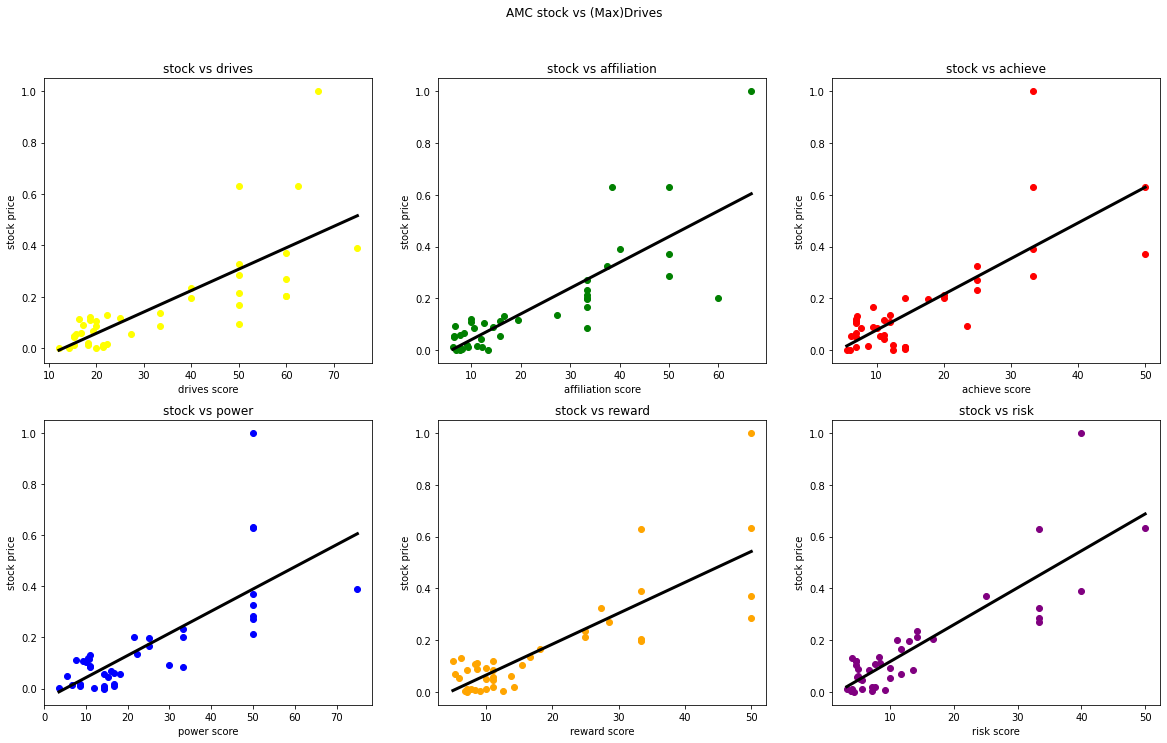

In [ ]:
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('AMC stock vs (Max)Drives')
fig.set_size_inches(20,10)

amc_sort_drives_max = amc_merge_pred1_max.sort_values(by=['drives'])
axs[0,0].scatter(amc_sort_drives_max[['drives']],amc_sort_drives_max[['close']],color='yellow',label='drives')#Plotting the data
axs[0,0].plot(amc_sort_drives_max[['drives']], amc_sort_drives_max[['pred_drives']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('stock vs drives')
axs[0,0].set(xlabel='drives score', ylabel='stock price')

amc_sort_affiliation_max = amc_merge_pred1_max.sort_values(by=['affiliation'])
axs[0,1].scatter(amc_sort_affiliation_max[['affiliation']],amc_sort_affiliation_max[['close']],color='green',label='affiliation')#Plotting the data
axs[0,1].plot(amc_sort_affiliation_max[['affiliation']], amc_sort_affiliation_max[['pred_affiliation']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs affiliation')
axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

amc_sort_achieve_max = amc_merge_pred1_max.sort_values(by=['achieve'])
axs[0,2].scatter(amc_sort_achieve_max[['achieve']],amc_sort_achieve_max[['close']],color='red',label='achieve') #Plotting the data
axs[0,2].plot(amc_sort_achieve_max[['achieve']], amc_sort_achieve_max[['pred_achieve']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('stock vs achieve')
axs[0,2].set(xlabel='achieve score', ylabel='stock price')

amc_sort_power_max = amc_merge_pred1_max.sort_values(by=['power'])
axs[1,0].scatter(amc_sort_power_max[['power']],amc_sort_power_max[['close']],color='blue',label='power')#Plotting the data
axs[1,0].plot(amc_sort_power_max[['power']], amc_sort_power_max[['pred_power']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs power')
axs[1,0].set(xlabel='power score', ylabel='stock price')

amc_sort_reward_max = amc_merge_pred1_max.sort_values(by=['reward'])
axs[1,1].scatter(amc_sort_reward_max[['reward']],amc_sort_reward_max[['close']],color='orange',label='reward')#Plotting the data
axs[1,1].plot(amc_sort_reward_max[['reward']], amc_sort_reward_max[['pred_reward']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs reward')
axs[1,1].set(xlabel='reward score', ylabel='stock price')

amc_sort_risk_max = amc_merge_pred1_max.sort_values(by=['risk'])
axs[1,2].scatter(amc_sort_risk_max[['risk']],amc_sort_risk_max[['close']],color='purple',label='risk')#Plotting the data
axs[1,2].plot(amc_sort_risk_max[['risk']], amc_sort_risk_max[['pred_risk']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,2].set_title('stock vs risk')
axs[1,2].set(xlabel='risk score', ylabel='stock price')

plt.show()

Training with min drives

In [ ]:
#Training models based on the amc data for four features("drives","affiliation","achieve","power","reward","risk") separately
reg_amc_drives_min = LinearRegression().fit(amc_merge_df_min[['drives']][:-10], amc_merge_df_min[['close']][:-10])
reg_amc_affiliation_min = LinearRegression().fit(amc_merge_df_min[['affiliation']][:-10], amc_merge_df_min[['close']][:-10])
reg_amc_achieve_min = LinearRegression().fit(amc_merge_df_min[['achieve']][:-10], amc_merge_df_min[['close']][:-10])
reg_amc_power_min = LinearRegression().fit(amc_merge_df_min[['power']][:-10], amc_merge_df_min[['close']][:-10])
reg_amc_reward_min = LinearRegression().fit(amc_merge_df_min[['reward']][:-10], amc_merge_df_min[['close']][:-10])
reg_amc_risk_min = LinearRegression().fit(amc_merge_df_min[['risk']][:-10], amc_merge_df_min[['close']][:-10])

In [ ]:
#predict the stock price of amc using new models
pred_amc_drives_min = reg_amc_drives_min.predict(amc_merge_df_min[['drives']][-10:])
pred_amc_affiliation_min = reg_amc_affiliation_min.predict(amc_merge_df_min[['affiliation']][-10:])
pred_amc_achieve_min = reg_amc_achieve_min.predict(amc_merge_df_min[['achieve']][-10:])
pred_amc_power_min = reg_amc_power_min.predict(amc_merge_df_min[['power']][-10:])
pred_amc_reward_min = reg_amc_reward_min.predict(amc_merge_df_min[['reward']][-10:])
pred_amc_risk_min = reg_amc_risk_min.predict(amc_merge_df_min[['risk']][-10:])

#predict on the training model to plot the data
train_amc_drives_min = reg_amc_drives_min.predict(amc_merge_df_min[['drives']][:-10])
train_amc_affiliation_min = reg_amc_affiliation_min.predict(amc_merge_df_min[['affiliation']][:-10])
train_amc_achieve_min = reg_amc_achieve_min.predict(amc_merge_df_min[['achieve']][:-10])
train_amc_power_min = reg_amc_power_min.predict(amc_merge_df_min[['power']][:-10])
train_amc_reward_min = reg_amc_reward_min.predict(amc_merge_df_min[['reward']][:-10])
train_amc_risk_min = reg_amc_risk_min.predict(amc_merge_df_min[['risk']][:-10])

#combine five kinds of prediction for amc with original data
amc_merge_pred1_min = pd.concat([amc_merge_df_min[:-10], pd.DataFrame(train_amc_drives_min,columns=['pred_drives'])], axis=1)
amc_merge_pred1_min = pd.concat([amc_merge_pred1_min, pd.DataFrame(train_amc_affiliation_min,columns=['pred_affiliation'])], axis=1)
amc_merge_pred1_min = pd.concat([amc_merge_pred1_min, pd.DataFrame(train_amc_achieve_min,columns=['pred_achieve'])], axis=1)
amc_merge_pred1_min = pd.concat([amc_merge_pred1_min, pd.DataFrame(train_amc_power_min,columns=['pred_power'])], axis=1)
amc_merge_pred1_min = pd.concat([amc_merge_pred1_min, pd.DataFrame(train_amc_reward_min,columns=['pred_reward'])], axis=1)
amc_merge_pred1_min = pd.concat([amc_merge_pred1_min, pd.DataFrame(train_amc_risk_min,columns=['pred_risk'])], axis=1)

#amc_merge_pred1_min

In [ ]:
amc_score_drives_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_drives_min)
amc_score_affiliation_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_affiliation_min)
amc_score_achieve_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_achieve_min)
amc_score_power_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_power_min)
amc_score_reward_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_reward_min)
amc_score_risk_min = mean_squared_error(amc_merge_df_min[['close']][-10:], pred_amc_risk_min)
[amc_score_drives_min,amc_score_affiliation_min,amc_score_achieve_min,amc_score_power_min,amc_score_reward_min,amc_score_risk_min]

[0.0184466410870559,
 0.0184466410870559,
 0.0184466410870559,
 0.0184466410870559,
 0.0184466410870559,
 0.0184466410870559]

In [ ]:
# fig, axs = plt.subplots(2,3)
# plt.subplots_adjust(bottom=0.01)
# fig.suptitle('AMC stock vs (Min)Drives')
# fig.set_size_inches(20,10)

# amc_sort_drives_min = amc_merge_pred1_min.sort_values(by=['drives'])
# axs[0,0].scatter(amc_sort_drives_min[['drives']],amc_sort_drives_min[['close']],color='yellow',label='drives')#Plotting the data
# axs[0,0].plot(amc_sort_drives_min[['drives']], amc_sort_drives_min[['pred_drives']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,0].set_title('stock vs drives')
# axs[0,0].set(xlabel='drives score', ylabel='stock price')

# amc_sort_affiliation_min = amc_merge_pred1_min.sort_values(by=['affiliation'])
# axs[0,1].scatter(amc_sort_affiliation_min[['affiliation']],amc_sort_affiliation_min[['close']],color='green',label='affiliation')#Plotting the data
# axs[0,1].plot(amc_sort_affiliation_min[['affiliation']], amc_sort_affiliation_min[['pred_affiliation']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[0,1].set_title('stock vs affiliation')
# axs[0,1].set(xlabel='affiliation score', ylabel='stock price')

# amc_sort_achieve_min = amc_merge_pred1_min.sort_values(by=['achieve'])
# axs[0,2].scatter(amc_sort_achieve_min[['achieve']],amc_sort_achieve_min[['close']],color='red',label='achieve') #Plotting the data
# axs[0,2].plot(amc_sort_achieve_min[['achieve']], amc_sort_achieve_min[['pred_achieve']], color='black', linewidth=3) #plotting the model by using the prediction
# axs[0,2].set_title('stock vs achieve')
# axs[0,2].set(xlabel='achieve score', ylabel='stock price')

# amc_sort_power_min = amc_merge_pred1_min.sort_values(by=['power'])
# axs[1,0].scatter(amc_sort_power_min[['power']],amc_sort_power_min[['close']],color='blue',label='power')#Plotting the data
# axs[1,0].plot(amc_sort_power_min[['power']], amc_sort_power_min[['pred_power']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,0].set_title('stock vs power')
# axs[1,0].set(xlabel='power score', ylabel='stock price')

# amc_sort_reward_min = amc_merge_pred1_min.sort_values(by=['reward'])
# axs[1,1].scatter(amc_sort_reward_min[['reward']],amc_sort_reward_min[['close']],color='orange',label='reward')#Plotting the data
# axs[1,1].plot(amc_sort_reward_min[['reward']], amc_sort_reward_min[['pred_reward']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,1].set_title('stock vs reward')
# axs[1,1].set(xlabel='reward score', ylabel='stock price')

# amc_sort_risk_min = amc_merge_pred1_min.sort_values(by=['risk'])
# axs[1,2].scatter(amc_sort_risk_min[['risk']],amc_sort_risk_min[['close']],color='purple',label='risk')#Plotting the data
# axs[1,2].plot(amc_sort_risk_min[['risk']], amc_sort_risk_min[['pred_risk']], color='black', linewidth=3)#plotting the model by using the prediction
# axs[1,2].set_title('stock vs risk')
# axs[1,2].set(xlabel='risk score', ylabel='stock price')

# plt.show()